# Basic Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [4]:
#loading csv file into pandas dataframe
data = pd.read_csv('Iris.csv')

In [5]:
#printing first five rows of the dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#checking number of rows and columns in the dataset
data.shape

(150, 6)

In [7]:
unique_labels = data['Species'].unique()
column_names = data.columns[1:len(data.columns)-1]

In [9]:
#checking null values in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
#checking data types
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
#describing statistics of the columns of the dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Exploratory data analysis

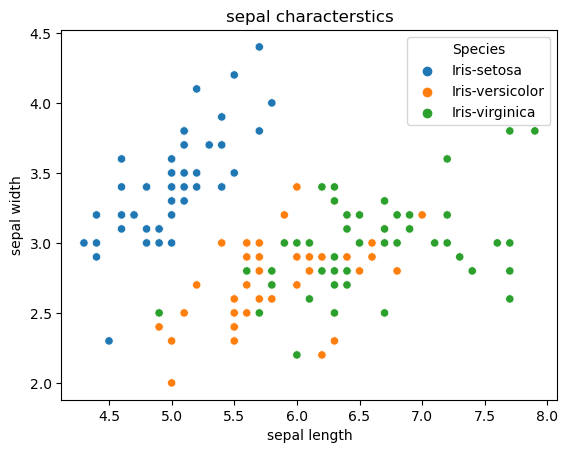

In [12]:
#sepal characterstics
sns.scatterplot(data=data,x='SepalLengthCm',y='SepalWidthCm',hue='Species')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('sepal characterstics')
plt.show()

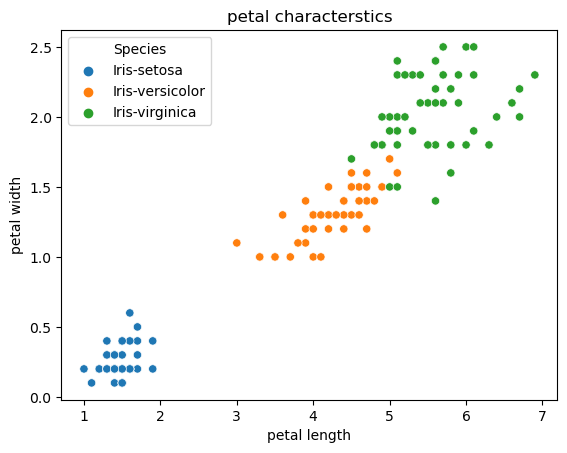

In [13]:
#petal characterstics
sns.scatterplot(data=data,x='PetalLengthCm',y='PetalWidthCm',hue='Species')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('petal characterstics')
plt.show()

# Feature engineering

In [14]:
#loading ordinal encoder class for label encoding
from sklearn.preprocessing import OrdinalEncoder

In [15]:
#converting categorical values into numerical values in target column by ordinal encoder
oe = OrdinalEncoder(categories=[unique_labels.tolist()])

In [16]:
data['Species_labels'] = oe.fit_transform(data[['Species']])

In [17]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.0


# Splitting datasets

In [18]:
#splitting dataset into independent and dependent features
X = data[column_names]
Y = data['Species_labels']

In [46]:
#loading important libraries required for machine learning 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

In [20]:
#splitting dataset into train and test datasets
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.2,random_state=0)

# Decision Tree Model

In [27]:
#deploying logistic regression model
params = {'max_depth':[5,7,9,12]}
gcv = GridSearchCV(DecisionTreeClassifier(),param_grid=params,cv=5,scoring='accuracy',n_jobs=-1)

In [28]:
#training the model with train dataset
gcv.fit(train_X,train_Y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 12]}, scoring='accuracy')

In [29]:
#best parameter
print('best parameter is:',gcv.best_params_)

best parameter is: {'max_depth': 5}


In [49]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(train_X,train_Y)

DecisionTreeClassifier(max_depth=5)

In [55]:
features_info = pd.DataFrame({'features':model.feature_names_in_,'feature importance':model.feature_importances_})
features_info 

,features,feature importance
0,SepalLengthCm,0.016712
1,SepalWidthCm,0.012534
2,PetalLengthCm,0.047734
3,PetalWidthCm,0.923020


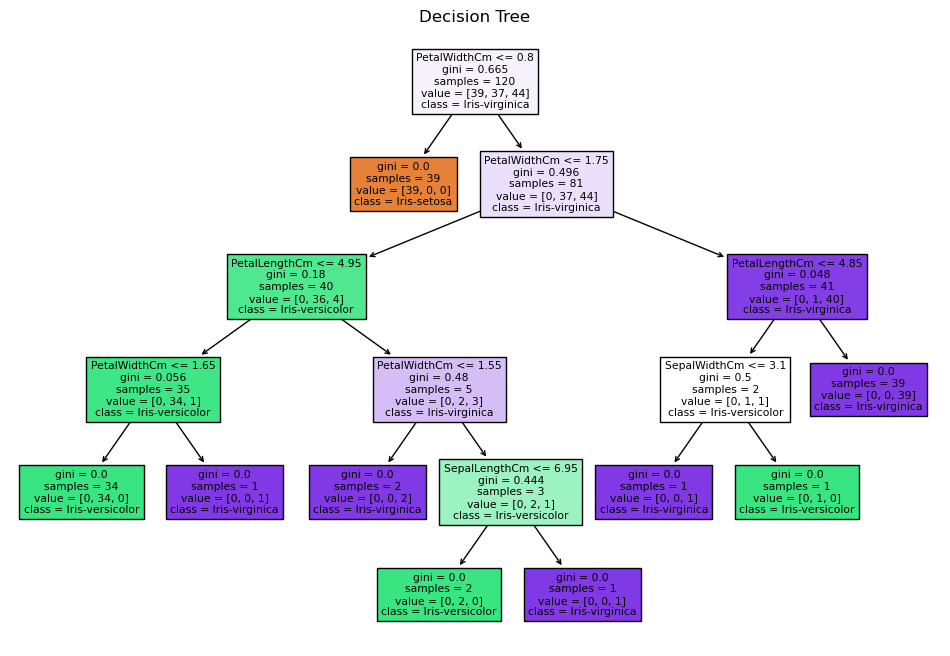

In [70]:
plt.figure(figsize=(12,8))
tree.plot_tree(model, feature_names=model.feature_names_in_.tolist(), class_names=data['Species'].unique().tolist(), filled=True)
plt.title('Decision Tree')
plt.show()

In [71]:
#prediction of test input data with the model
pred_test_Y = model.predict(test_X)

In [72]:
#accuracy of the model
print(f'accuracy of the model is {accuracy_score(pred_test_Y,test_Y)*100} %')

accuracy of the model is 100.0 %


In [73]:
#confusion matrix
cm = confusion_matrix(pred_test_Y, test_Y)

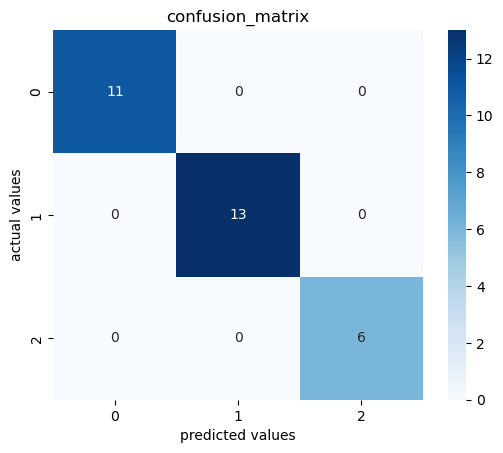

In [74]:
sns.heatmap(cm,annot=True,cmap='Blues',square=True)
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('confusion_matrix')
plt.show()

In [75]:
#classification report
print(classification_report(pred_test_Y,test_Y))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

